In [95]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import OrderedDict

try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
    # montar el drive, que es donde tenemos el dataset
    from google.colab import drive
    drive.mount("/content/drive")
    data_dir = "/content/drive/MyDrive/2023/Publica/Alumnos/"
    sys.path.append(data_dir)
else:
    import os
    data_dir = "/Users/daniel.martinezcarre/Desktop/Clase/IA/Programacion de IA/datos/"


filename = data_dir + "euro-dollar-clean.csv"
df = pd.read_csv(filename)
df.head()

,year,month,day,dollar
0,2021,9,20,1.1711
1,2021,9,17,1.1780
2,2021,9,16,1.1763
3,2021,9,15,1.1824
4,2021,9,14,1.1814


In [96]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3009 entries, 0 to 3008
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    3009 non-null   int64  
 1   month   3009 non-null   int64  
 2   day     3009 non-null   int64  
 3   dollar  3009 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 94.2 KB


In [100]:
# df_final = df_sorted.groupby(["year", "month"])["dollar"].mean()
# df_final = df_final.unstack()
# df_final
df_final = df.groupby(["year", "month"])["dollar"].mean().unstack()

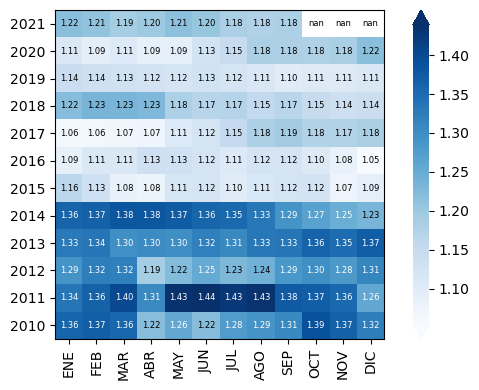

In [104]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=100)

text_colors = ('black', 'white')
im = ax.imshow(df_final, cmap='Blues')
cbar = fig.colorbar(im, ax=ax, extend='both')
cbar.outline.set_visible(False)

x = df_final.columns
y = df_final.index

# Mostrar las etiquetas. El color del texto cambia en función de su normalización
for i in range(len(y)):
    for j in range(len(x)):
        value = df_final.iloc[i, j]
        text_color = text_colors[int(im.norm(value) > 0.5)]  # color etiqueta
        ax.text(j, i, f'{value:.2f}', color=text_color, va='center', ha='center', size=6)

# Formateo de los ejes
ax.set_xticks(range(len(x)))
ax.set_xticklabels(
    ['ENE', 'FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL', 'AGO', 'SEP', 'OCT', 'NOV', 'DIC'],
    rotation=90,
)
ax.set_yticks(range(len(y)))
ax.set_yticklabels(y)
ax.invert_yaxis()



fig.tight_layout()